<a href="https://colab.research.google.com/github/KEHSANN/universe/blob/main/ehsan_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:


!pip install --upgrade --no-cache-dir gdown
!gdown 1loy-K-DWIMnWDKkIY_E-pRtKK-j5atUD
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Load the text file into a DataFrame
file_path = "/content/heart_disease_health_indicators.csv"
df = pd.read_csv(file_path, header=None)
df = df.drop(0)
df[:2]



Downloading...
From: https://drive.google.com/uc?id=1loy-K-DWIMnWDKkIY_E-pRtKK-j5atUD
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 55.4MB/s]


<ipython-input-180-872e316d1a81>:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
1,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
2,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1


In [188]:


df_new

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
46754,1,0,0,1,27,0,1,0,1,1,...,1,0,3,0,15,1,0,13,5,2
205042,1,1,1,1,23,1,1,0,0,0,...,1,0,5,30,30,1,1,10,2,3
169773,1,1,1,1,48,0,0,0,0,1,...,1,0,5,0,30,1,0,10,5,8
73774,1,1,0,1,32,1,0,2,0,0,...,1,0,3,30,2,1,0,8,5,6
246984,1,1,1,1,27,1,1,2,0,1,...,1,0,4,30,20,0,0,11,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205890,0,1,0,1,44,0,0,0,0,1,...,1,0,3,20,0,0,0,3,5,5
227453,0,1,0,1,38,0,0,0,1,1,...,1,0,3,0,0,0,0,8,4,8
101165,0,0,1,1,24,0,0,0,1,1,...,1,0,1,0,0,0,1,7,6,8
59986,0,0,0,1,25,0,0,0,1,0,...,1,0,2,0,1,0,0,5,5,8


In [317]:


df_1 = df[df[0] == 1].sample(100, random_state=23)
df_0 = df[df[0] == 0].sample(100, random_state=23)


# نمایش دیتاست‌های جدا شده
print(df_1.head())
print(df_0.head())

df = pd.concat([df_1, df_0], axis=0)

feature = []
for i in range(df.shape[1]):
  if i !=0:
    feature.append(i)


X = df[feature].values
y = df[0].values


df


       0  1  2  3   4  5  6  7  8  9   ... 12 13 14 15  16 17 18  19 20 21
34753   1  0  0  1  25  0  0  0  1  0  ...  1  0  3  0   0  0  1   4  5  7
214101  1  1  1  1  20  1  1  0  0  0  ...  1  0  5  0  30  1  0  13  6  3
215736  1  1  1  1  29  0  0  0  0  0  ...  1  1  5  3  30  1  0  13  4  3
218269  1  1  1  1  22  1  1  0  1  0  ...  1  0  5  0  15  1  1  11  4  4
233663  1  1  1  1  36  0  0  0  1  1  ...  1  0  2  0   0  0  1  12  6  8

[5 rows x 22 columns]
       0  1  2  3   4  5  6  7  8  9   ... 12 13 14 15 16 17 18  19 20 21
139101  0  0  1  1  24  1  0  0  1  1  ...  1  0  2  0  0  0  1   4  6  8
160293  0  0  0  1  22  0  0  0  1  1  ...  1  0  1  0  0  0  0   9  6  8
39384   0  1  1  1  24  1  0  0  1  1  ...  1  0  3  0  1  0  1  10  6  7
104566  0  0  0  1  24  0  0  0  1  0  ...  1  0  2  0  0  0  1   2  5  5
35394   0  0  0  1  25  0  0  0  1  0  ...  1  0  2  0  0  0  1   7  6  4

[5 rows x 22 columns]


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
34753,1,0,0,1,25,0,0,0,1,0,...,1,0,3,0,0,0,1,4,5,7
214101,1,1,1,1,20,1,1,0,0,0,...,1,0,5,0,30,1,0,13,6,3
215736,1,1,1,1,29,0,0,0,0,0,...,1,1,5,3,30,1,0,13,4,3
218269,1,1,1,1,22,1,1,0,1,0,...,1,0,5,0,15,1,1,11,4,4
233663,1,1,1,1,36,0,0,0,1,1,...,1,0,2,0,0,0,1,12,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128048,0,1,0,1,26,1,0,0,1,1,...,1,0,2,0,0,1,1,13,4,4
114895,0,0,0,1,34,1,0,0,1,1,...,1,0,2,0,0,0,0,8,6,7
60413,0,0,0,1,20,0,0,0,1,1,...,1,0,2,0,0,0,0,8,6,8
95887,0,0,0,0,23,0,0,0,0,1,...,1,0,1,4,1,0,1,2,6,6


In [196]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state=23)

X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


# آموزش مدل‌ها
log_reg = LogisticRegression()
sgd_clf = SGDClassifier()

log_reg.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)


# پیش‌بینی برچسب‌ها
y_pred_log_reg = log_reg.predict(X_test)
y_pred_sgd_clf = sgd_clf.predict(X_test)


# محاسبه دقت مدل‌ها
accuracy_log_reg = log_reg.score(X_train, y_train)
accuracy_log_reg_test = log_reg.score(X_test, y_test)

accuracy_sgd_clf = sgd_clf.score(X_train, y_train)
accuracy_sgd_clf_test = sgd_clf.score(X_test, y_test)

print("Logistic Regression predictions:", y_pred_log_reg[:5])
print("sgd predictions:", y_pred_sgd_clf[:5])

print("Logistic Regression train accuracy:", accuracy_log_reg)
print("Logistic Regression test accuracy:", accuracy_log_reg_test)

print("sgd test accuracy :", accuracy_sgd_clf_test)
print("sgd train accuracy :", accuracy_sgd_clf)

Logistic Regression predictions: [1 1 0 1 1]
sgd predictions: [1 1 1 1 1]
Logistic Regression train accuracy: 0.7625
Logistic Regression test accuracy: 0.65
sgd test accuracy : 0.65
sgd train accuracy : 0.6875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression predictions: [0 0 0 0 0]
Logistic Regression train accuracy: 0.9064052274698415


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [310]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# آموزش مدل‌ها
log_reg = LogisticRegression()
sgd_clf = SGDClassifier(loss='log' ,random_state=23)

log_reg.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها
y_pred_log_reg = log_reg.predict(X_test)
y_pred_sgd_clf = sgd_clf.predict(X_test)

# محاسبه دقت مدل‌ها
accuracy_log_reg = log_reg.score(X_train, y_train)
accuracy_log_reg_test = log_reg.score(X_test, y_test)

accuracy_sgd_clf = sgd_clf.score(X_train, y_train)
accuracy_sgd_clf_test = sgd_clf.score(X_test, y_test)

print("Logistic Regression predictions:", y_pred_log_reg[:5])
print("SGD predictions:", y_pred_sgd_clf[:5])

print("Logistic Regression train accuracy:", accuracy_log_reg)
print("Logistic Regression test accuracy:", accuracy_log_reg_test)

print("SGD train accuracy:", accuracy_sgd_clf)
print("SGD test accuracy:", accuracy_sgd_clf_test)

Logistic Regression predictions: [1 1 0 1 1]
SGD predictions: [0 0 0 0 1]
Logistic Regression train accuracy: 0.7625
Logistic Regression test accuracy: 0.65
SGD train accuracy: 0.525
SGD test accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


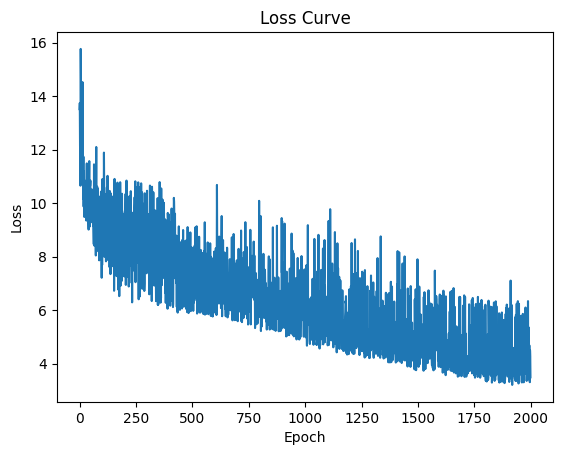

0.525

In [344]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss



# آموزش مدل با الگوریتم SGDClassifier و تابع اتلاف 'log_loss'
model = SGDClassifier(loss='log', random_state=42)
losses = []
epochs = 2000

for _ in range(epochs):

    model.partial_fit(X_train, y_train, [0, 1])
    loss = log_loss(y_train , model.predict_proba(X_train))
    losses.append(loss)


# نمایش نمودار تابع اتلاف
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()
accuracy_sgd_clf = sgd_clf.score(X_train, y_train)
accuracy_sgd_clf